Step 1: Install Required Libraries
First, ensure you have the required libraries installed. You can install pandas and matplotlib using pip:

In [9]:
%pip install pandas matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


  Matrix Size  Kernel Size  Threads  Run ID  Execution Time (Microseconds)  \
0     256x256            3        1       1                        3730.48   
1     256x256            3        1       2                        4522.52   
2     256x256            3        1       3                        4415.09   
3     256x256            3        1       4                        3671.88   
4     256x256            3        1       5                        8368.96   

  Correctness  
0    Correct!  
1    Correct!  
2    Correct!  
3    Correct!  
4    Correct!  
       Kernel Size      Threads      Run ID  Execution Time (Microseconds)
count  3360.000000  3360.000000  3360.00000                   3.360000e+03
mean      6.000000     9.142857    15.50000                   5.034486e+05
std       2.236401    10.563344     8.65673                   1.299835e+06
min       3.000000     1.000000     1.00000                   1.119460e+03
25%       4.500000     1.000000     8.00000                 

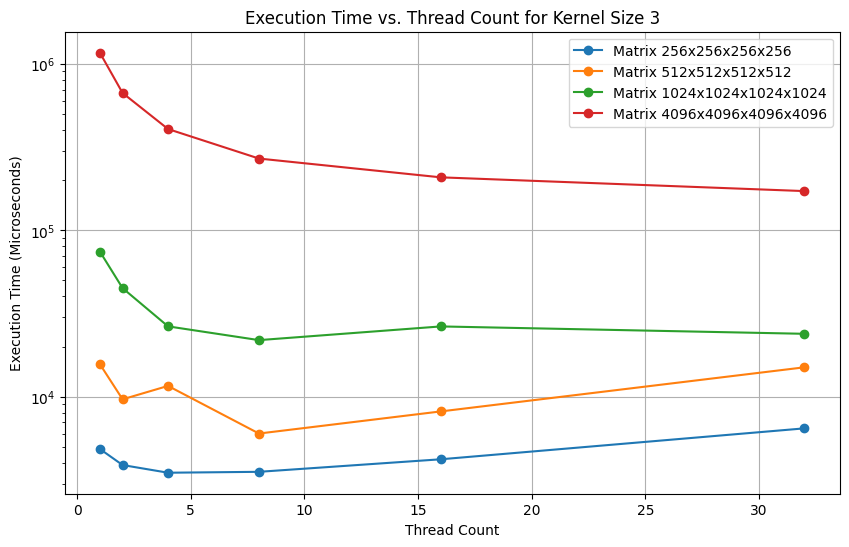

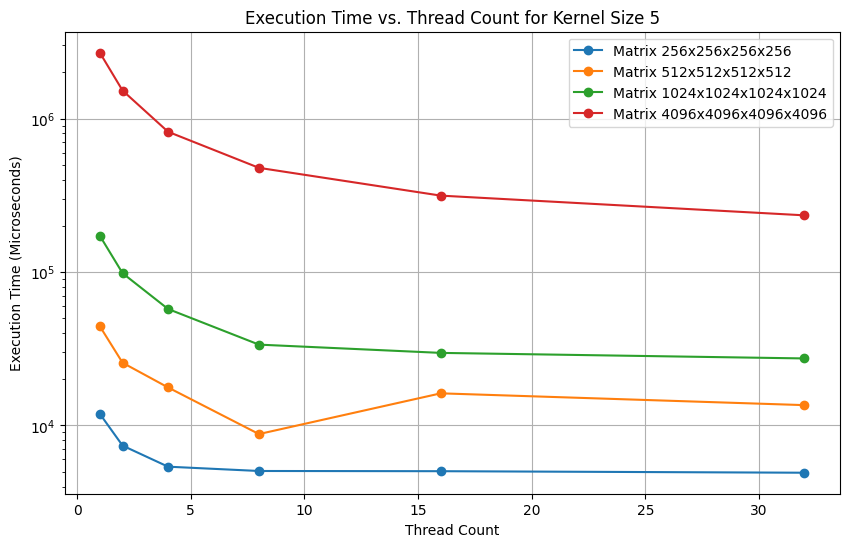

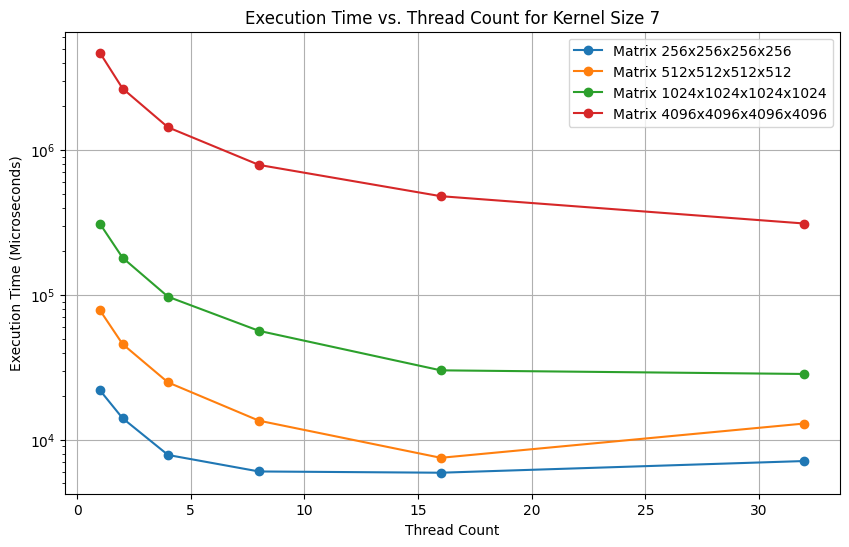

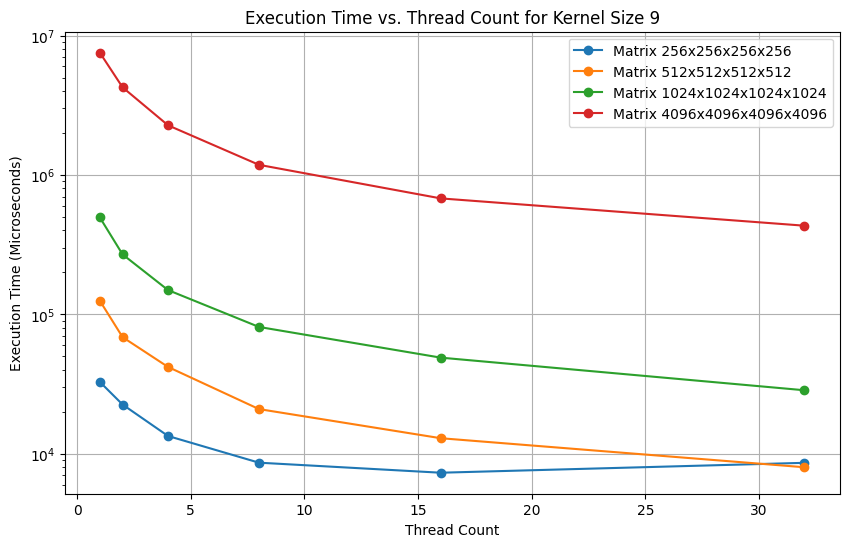

Correctness                      Correct!
Matrix Size Kernel Size Threads          
1024x1024   3           1              60
                        2              30
                        4              30
                        8              30
                        16             30
...                                   ...
512x512     9           2              30
                        4              30
                        8              30
                        16             30
                        32             30

[96 rows x 1 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('execution_times_c2_dy_blk_reduc.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Group by matrix size, kernel size, and threads, and calculate the mean execution time
mean_exec_time = df.groupby(['Matrix Size', 'Kernel Size', 'Threads'])['Execution Time (Microseconds)'].mean().reset_index()

# Display the mean execution time
print(mean_exec_time)

# Plot execution time vs. thread count for different matrix sizes, with separate graphs for each kernel size
for kernel_size in df['Kernel Size'].unique():
    plt.figure(figsize=(10, 6))
    for matrix_size in df['Matrix Size'].unique():
        subset = mean_exec_time[(mean_exec_time['Kernel Size'] == kernel_size) & (mean_exec_time['Matrix Size'] == matrix_size)]
        plt.plot(subset['Threads'], subset['Execution Time (Microseconds)'], marker='o', label=f'Matrix {matrix_size}')
    plt.title(f'Execution Time vs. Thread Count for Kernel Size {kernel_size}')
    plt.xlabel('Thread Count')
    plt.ylabel('Execution Time (Microseconds)')
    plt.yscale('log')  # Apply logarithmic scale to the y-axis
    plt.legend()
    plt.grid(True)
    plt.show()

# Check the correctness of the results
correctness_summary = df.groupby(['Matrix Size', 'Kernel Size', 'Threads'])['Correctness'].value_counts().unstack().fillna(0)
print(correctness_summary)